# 『5과목』 AI와 딥러닝

## Set Up

In [18]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # Windows
# matplotlib.rcParams['font.family'] = 'AppleGothic' # Mac
matplotlib.rcParams['font.size'] = 15 # 글자 크기
matplotlib.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용 시, 마이너스 글자가 깨지는 현상을 해결

# CNN

### 합성곱층 예제 (1)

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_sample_image

china = load_sample_image("china.jpg")
flower = load_sample_image("flower.jpg")

image = china[150:220, 130:250]
height, width, channels = image.shape
image_grayscale = image.mean(axis=2).astype(np.float32)
images = image_grayscale.reshape(1, height, width, 1)
print('images.shape :', images.shape)

images.shape : (1, 70, 120, 1)


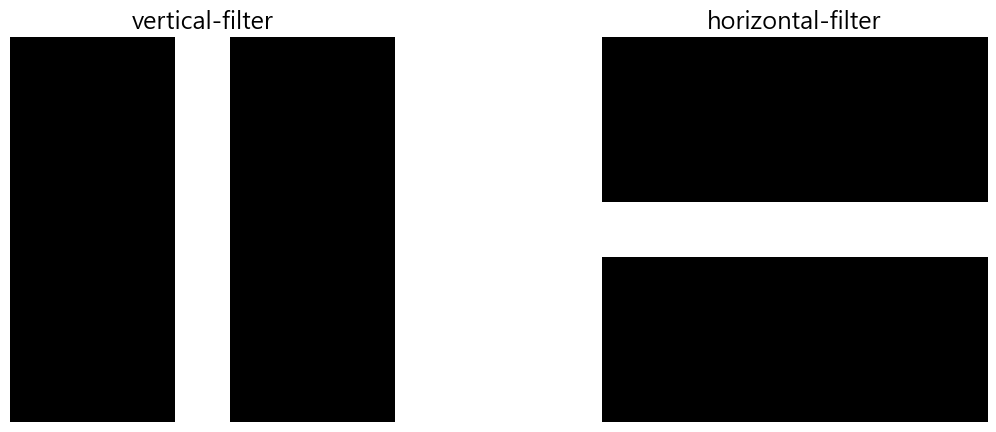

In [20]:
fmap = np.zeros(shape=(7, 7, 1, 2), dtype=np.float32)
fmap[:, 3, 0, 0] = 1
fmap[3, :, 0, 1] = 1

# matplotlib으로 plotting하기
fig, axs = plt.subplots(1, 2, figsize=(14, 5))
pl_images = [
    fmap[:, :, 0, 0],  # vertical-filter
    fmap[:, :, 0, 1],  # horizontal-filter
]

titles = ['vertical-filter', 'horizontal-filter']

for i, (image, title) in enumerate(zip(pl_images, titles)):
    axs[i].imshow(image, cmap='gray')
    axs[i].set_title(title)
    axs[i].axis('off')

In [21]:
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

X = tf.placeholder(tf.float32, shape=[None, height, width, 1])
filters = tf.constant(fmap)

conv = tf.nn.conv2d(X, filters, strides=[1, 1, 1, 1], padding="SAME")

with tf.Session() as sess:
    output = conv.eval(feed_dict={X: images})
    
print('output.shape :', output.shape)

output.shape : (1, 70, 120, 2)


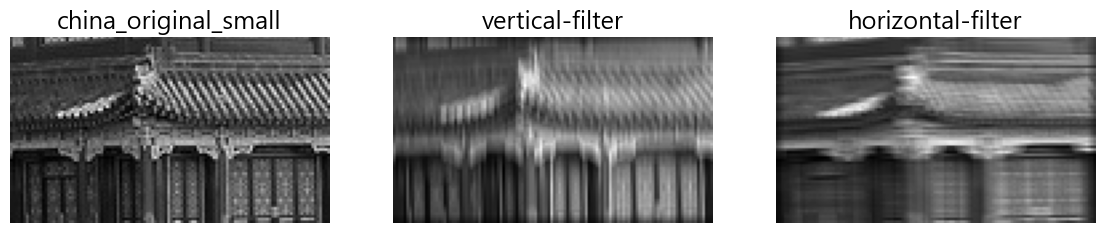

In [22]:
# matplotlib으로 plotting하기
fig, axs = plt.subplots(1, 3, figsize=(14, 5))
pl_images = [
    images[0, :, :, 0],  # original
    output[0, :, :, 0],  # vertical-filter
    output[0, :, :, 1],  # horizontal-filter
]

titles = ['china_original_small', 'vertical-filter', 'horizontal-filter']

for i, (image, title) in enumerate(zip(pl_images, titles)):
    axs[i].imshow(image, cmap='gray')
    axs[i].set_title(title)
    axs[i].axis('off')

합성곱층 예제 (2)

In [23]:
from sklearn.datasets import load_sample_image

# Load sample images
china = load_sample_image("china.jpg")
dataset = np.array(china, dtype=np.float32)
height, width, channels = dataset.shape
dataset = dataset.reshape([1, height, width, channels])

# Create 2 filters
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1  # vertical line
filters[3, :, :, 1] = 1  # horizontal line

# Create a graph with input X plus a convolutional layer applying the 2 filters
X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
convolution = tf.nn.conv2d(X, filters, strides=[1,2,2,1], padding="SAME")

with tf.Session() as sess:
    output = sess.run(convolution, feed_dict={X: dataset})

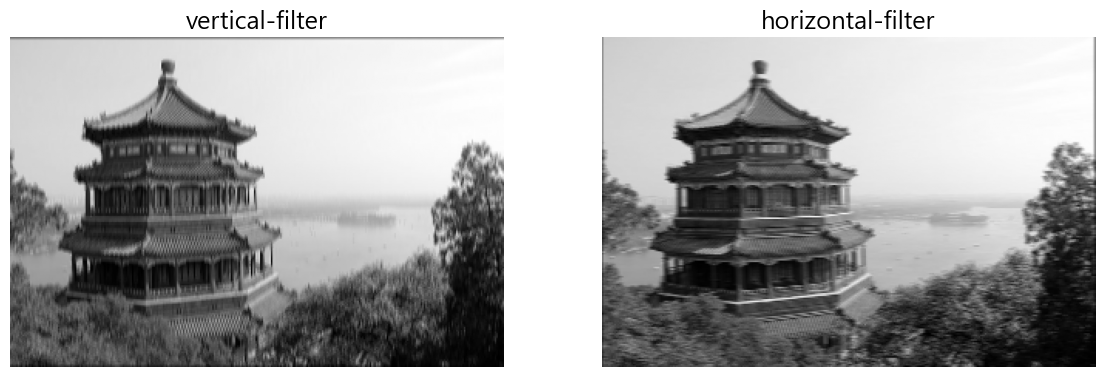

In [24]:
# matplotlib으로 plotting하기
fig, axs = plt.subplots(1, 2, figsize=(14, 5))
pl_images = [
    output[0, :, :, 0],  # vertical-filter
    output[0, :, :, 1],  # horizontal-filter
]

titles = ['vertical-filter', 'horizontal-filter']

for i, (image, title) in enumerate(zip(pl_images, titles)):
    axs[i].imshow(image, cmap='gray')
    axs[i].set_title(title)
    axs[i].axis('off')

plt.show()

### tf.lyaers.conv2d 사용

In [25]:
#import tensorflow.compat.v1 as tf
#tf.disable_v2_behavior()
#import numpy as np

# Assuming height, width, channels, and dataset are defined
#height = 28
#width = 28
#channels = 1
#dataset = np.random.rand(1, height, width, channels)  # Example dataset

X = tf.placeholder(tf.float32, shape=[None, height, width, channels])
conv = tf.keras.layers.Conv2D(filters=2, kernel_size=7, strides=[2, 2], padding='SAME',
                              kernel_initializer=tf.keras.initializers.GlorotUniform())(X)

# Initialize variables
init = tf.compat.v1.global_variables_initializer()

# Run the session
with tf.compat.v1.Session() as sess:
    sess.run(init)
    output = sess.run(conv, feed_dict={X: dataset})
    print(output.shape)  # Debugging print to verify output shape

(1, 214, 320, 2)


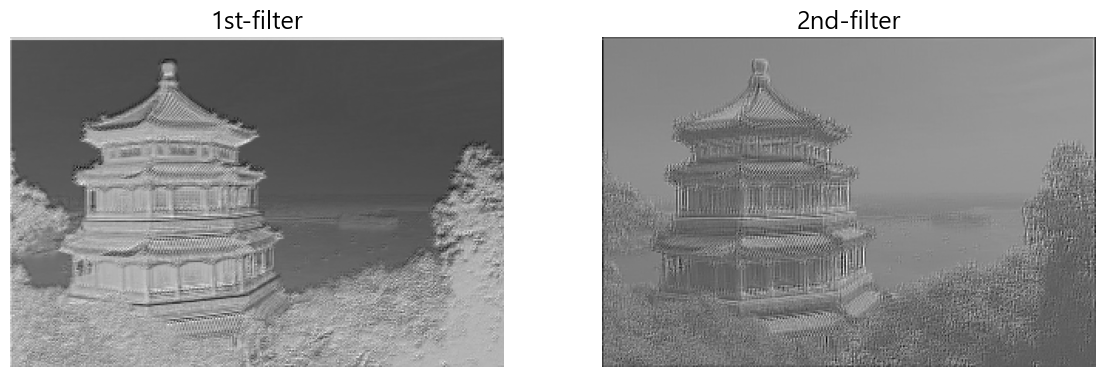

In [26]:
# matplotlib으로 plotting하기
fig, axs = plt.subplots(1, 2, figsize=(14, 5))
pl_images = [
    output[0, :, :, 0],  # 1st filter
    output[0, :, :, 1],  # 2nd filter
]

titles = ['1st-filter', '2nd-filter']

for i, (image, title) in enumerate(zip(pl_images, titles)):
    axs[i].imshow(image, cmap='gray')
    axs[i].set_title(title)
    axs[i].axis('off')

plt.show()

### 텐서플로에서의 풀링층

### tf.nn.max_pool 사용

In [27]:
X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
max_pool = tf.nn.max_pool(X, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="SAME")

with tf.Session() as sess:
    output = sess.run(max_pool, feed_dict={X: dataset})

print('dataset.shape :', dataset.shape)
print('output.shape (after max-pooling) :', output.shape)

dataset.shape : (1, 427, 640, 3)
output.shape (after max-pooling) : (1, 214, 320, 3)


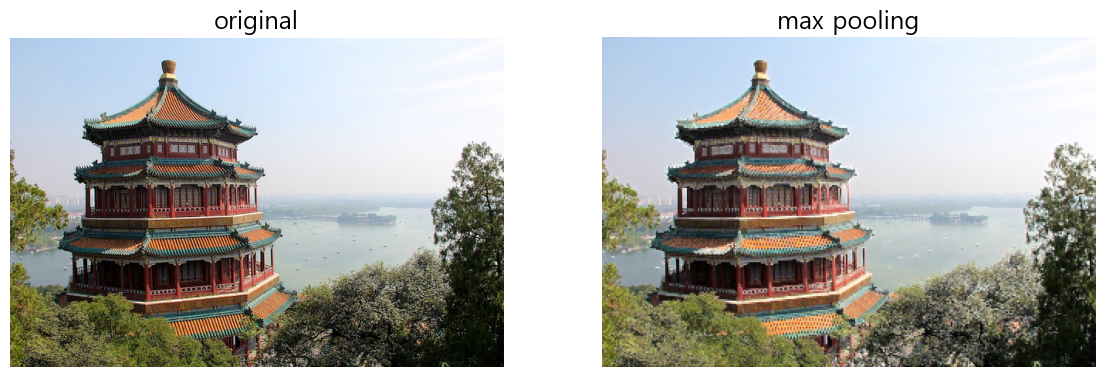

In [28]:
# matplotlib으로 plotting하기
fig, axs = plt.subplots(1, 2, figsize=(14, 5))
pl_images = [
    dataset[0],  # original
    output[0],   # max_pooling
]

titles = ['original', 'max pooling']

for i, (image, title) in enumerate(zip(pl_images, titles)):
    axs[i].imshow(image.astype(np.uint8))
    axs[i].set_title(title)
    axs[i].axis('off')

plt.show()

### tf.layers.max_pooling2d 사용

In [29]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
conv = Conv2D(filters=2, kernel_size=7, strides=[2, 2], padding='SAME')(X)
max_pool = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='SAME')(conv)

# Initialize variables
init = tf.compat.v1.global_variables_initializer()

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    output = sess.run(max_pool, feed_dict={X: dataset})

print('dataset.shape :', dataset.shape)
print('output.shape (after max-pooling) :', output.shape)

dataset.shape : (1, 427, 640, 3)
output.shape (after max-pooling) : (1, 107, 160, 2)


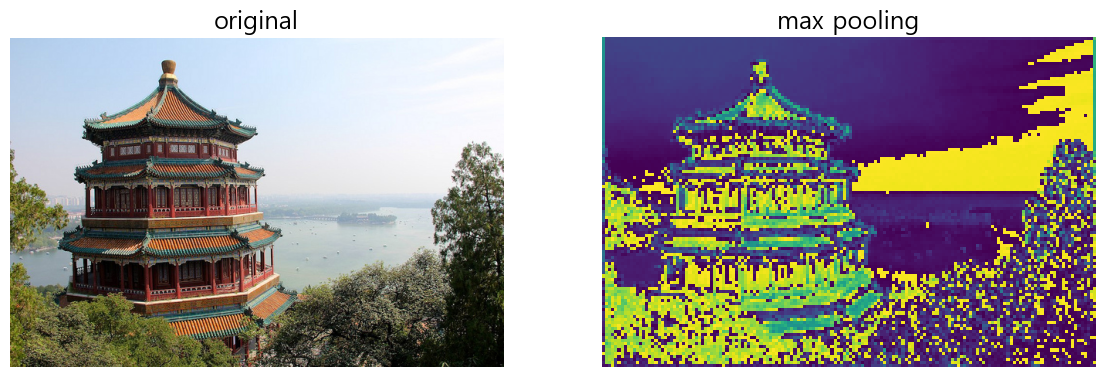

In [30]:
# 두 개의 서브플롯이 있는 figure 생성
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# 이미지와 제목 준비
pl_images = [
    dataset[0].astype(np.uint8),  # 원본 이미지 (imshow를 위해 uint8로 변환)
    output[0, :, :, 0].astype(np.uint8)  # 맥스 풀링 후의 첫 번째 필터 선택 (imshow를 위해 uint8로 변환)
]
titles = ['original', 'max pooling']

# 각 이미지 플로팅
for i, (image, title) in enumerate(zip(pl_images, titles)):
    axs[i].imshow(image)
    axs[i].set_title(title)
    axs[i].axis('off')

In [1]:
import tensorflow as tf

print(tf.executing_eagerly())

True


In [34]:
# import tensorflow as tf
# tf.config.run_functions_eagerly(True)

```
if False :
    
import tensorflow as tf
tf.config.run_functions_eagerly(True)

재시작 후 다시 실행

# LeNet-5 사례 [LeCun1998] 재현해 보기

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.optimizers import Adam

# MNIST 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train,y_train),(x_test,y_test)= mnist.load_data()
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

# LeNet-5 신경망 모델 설계
cnn=Sequential()
cnn.add(Conv2D(6,(5,5),padding='same',activation='relu',input_shape=(28,28,1)))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Conv2D(16,(5,5),padding='same',activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Conv2D(120,(5,5),padding='same',activation='relu'))
cnn.add(Flatten())
cnn.add(Dense(84,activation='relu'))
cnn.add(Dense(10,activation='softmax'))

# 신경망 모델 학습
cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
hist=cnn.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

# 신경망 모델 정확률 평가
res=cnn.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)


c:\DEV\envs\py3_10_tf\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
469/469 - 38s - 80ms/step - accuracy: 0.9370 - loss: 0.2114 - val_accuracy: 0.9760 - val_loss: 0.0630
Epoch 2/30
469/469 - 39s - 83ms/step - accuracy: 0.9828 - loss: 0.0558 - val_accuracy: 0.9882 - val_loss: 0.0346
Epoch 3/30
469/469 - 41s - 87ms/step - accuracy: 0.9884 - loss: 0.0365 - val_accuracy: 0.9871 - val_loss: 0.0388
Epoch 4/30
469/469 - 42s - 91ms/step - accuracy: 0.9907 - loss: 0.0286 - val_accuracy: 0.9905 - val_loss: 0.0315
Epoch 5/30
469/469 - 41s - 87ms/step - accuracy: 0.9927 - loss: 0.0231 - val_accuracy: 0.9906 - val_loss: 0.0288
Epoch 6/30
469/469 - 42s - 90ms/step - accuracy: 0.9941 - loss: 0.0186 - val_accuracy: 0.9876 - val_loss: 0.0378
Epoch 7/30
469/469 - 41s - 87ms/step - accuracy: 0.9950 - loss: 0.0154 - val_accuracy: 0.9911 - val_loss: 0.0285
Epoch 8/30
469/469 - 39s - 84ms/step - accuracy: 0.9956 - loss: 0.0139 - val_accuracy: 0.9901 - val_loss: 0.0337
Epoch 9/30
469/469 - 42s - 90ms/step - accuracy: 0.9962 - loss: 0.0110 - val_accuracy: 0.9910 - 

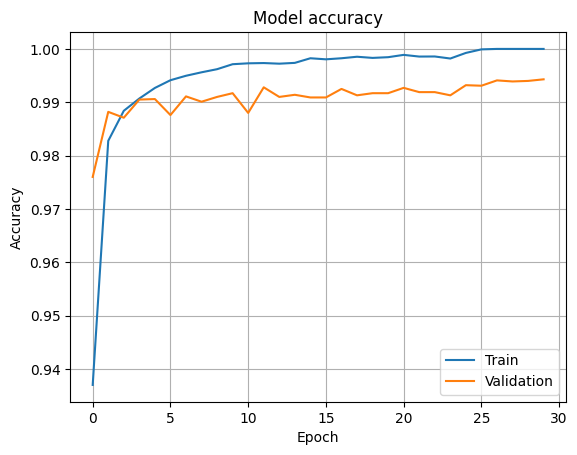

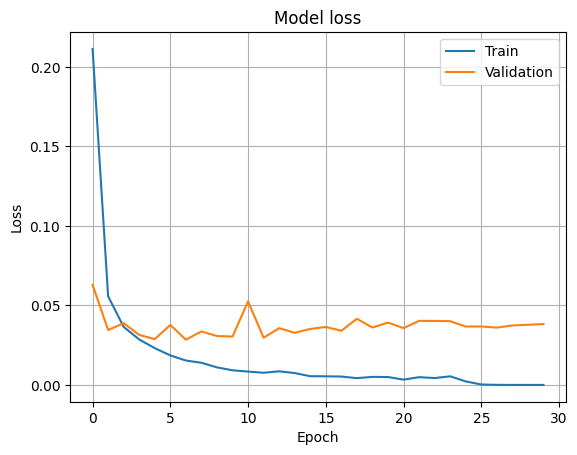

In [3]:
import matplotlib.pyplot as plt

# 정확률 그래프
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()

# 손실 함수 그래프
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()